In [1]:
import os
os.chdir('G:\kaggle data set\HR Promotion Analytics Vidhya')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Load Train Dataset

In [2]:
train = pd.read_csv('train.csv')
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
# Let's Check Dataset is balanced or unbalanced ,

promoted = len(train[train["is_promoted"]==1])
print("promoted employee's :",promoted)
not_promoted = len(train[train["is_promoted"]==0])
print("not promoted employee's :",not_promoted)

promoted employee's : 4668
not promoted employee's : 50140


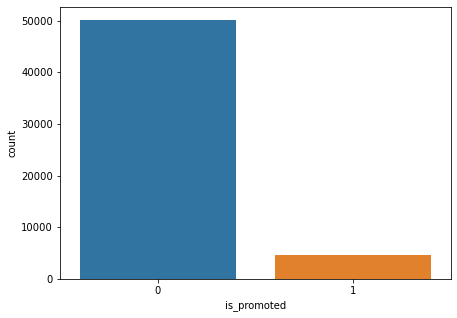

In [4]:
plt.figure(figsize=(7,5))
sns.countplot(train["is_promoted"])

Dataset is imbalanced so need to balance the dataset,

# EDA

In [5]:
#check null values in training dataset. 

nan_feature = [feature for feature in train.columns if train[feature].isnull().sum()>1]
nan_feature

['education', 'previous_year_rating']

In [6]:
# Percentage of NaN values.
train[nan_feature].isnull().mean()

education               0.043953
previous_year_rating    0.075244
dtype: float64

In [7]:
#check duplicate records in training datasets.
train.duplicated().sum()

0

In [8]:
print("Shape of Train :",train.shape)

Shape of Train : (54808, 14)


In [9]:
#Check the No. of Employees Promoted

train["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

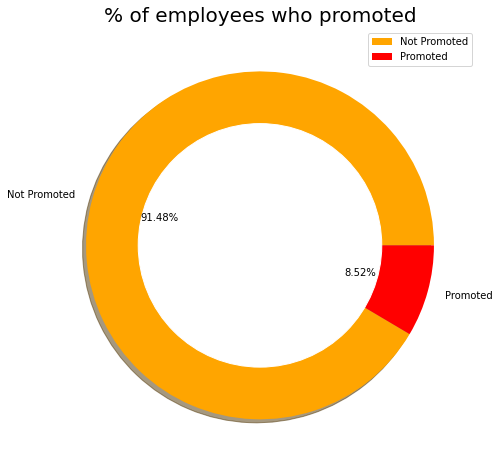

In [10]:
# plot a donut chart for visualizing  employee's promoted in percentage.

size = [50140, 4668]
hollow_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.figure(figsize=(8,8))
plt.pie(size, colors = ['orange', 'red'] , labels =["Not Promoted", "Promoted"], shadow = True, autopct = '%.2f%%')
plt.title('% of employees who promoted', fontsize = 20)
plt.gca().add_artist(hollow_circle)
plt.legend()
plt.show()

# Department

In [11]:
#unique values in department feature

train["department"].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [12]:
train["department"].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

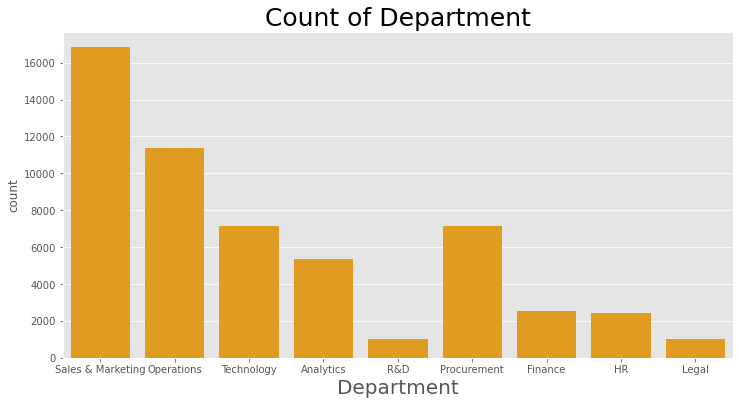

In [13]:
plt.figure(figsize=(12,6))
style.use("ggplot")
sns.countplot(train["department"],color="orange")
plt.title("Count of Department",fontsize=25)
plt.xlabel("Department",fontsize=20)
plt.show()

Sales & Marketing Department has highest number of employee's

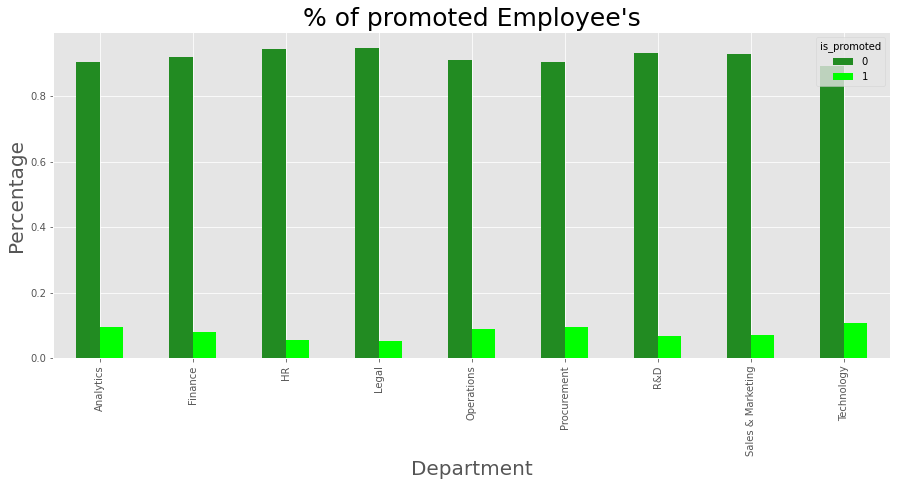

In [14]:
#Percentage of promoted Employee's from each department.

crosstab = pd.crosstab(train['department'], train['is_promoted'])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(15,6),color=['forestgreen','lime'])
plt.title("% of promoted Employee's",fontsize=25)
plt.xlabel("Department",fontsize=20)
plt.ylabel("Percentage",fontsize=20)
plt.show()

from Technology,Procurement,operation and Analytics Department employee's got high Promotion.

# Region

In [15]:
#unique values in region.

print(train["region"].unique())

print("length of region:",len(train["region"].unique()))

['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
length of region: 34


In [16]:
train["region"].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

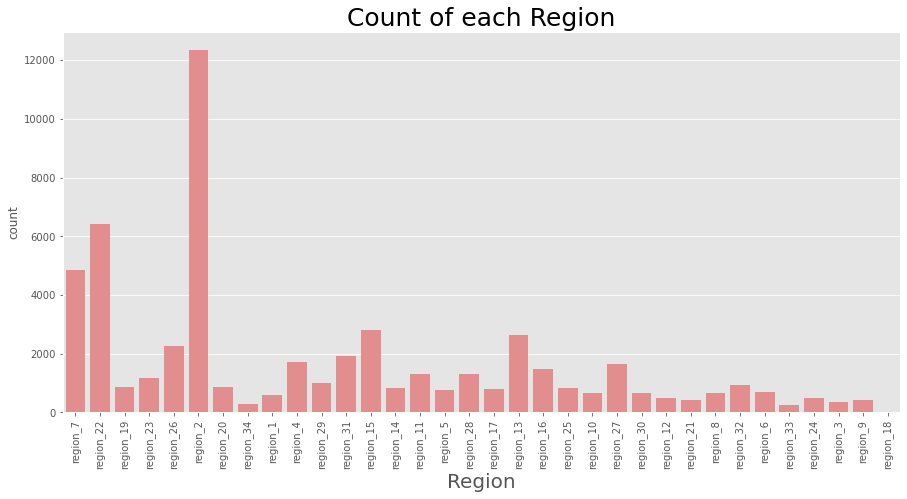

In [17]:
plt.figure(figsize=(15,7))
style.use("ggplot")
sns.countplot(train["region"],color="lightcoral")
plt.title("Count of each Region",fontsize=25)
plt.xlabel("Region",fontsize=20)
plt.xticks(rotation=90)

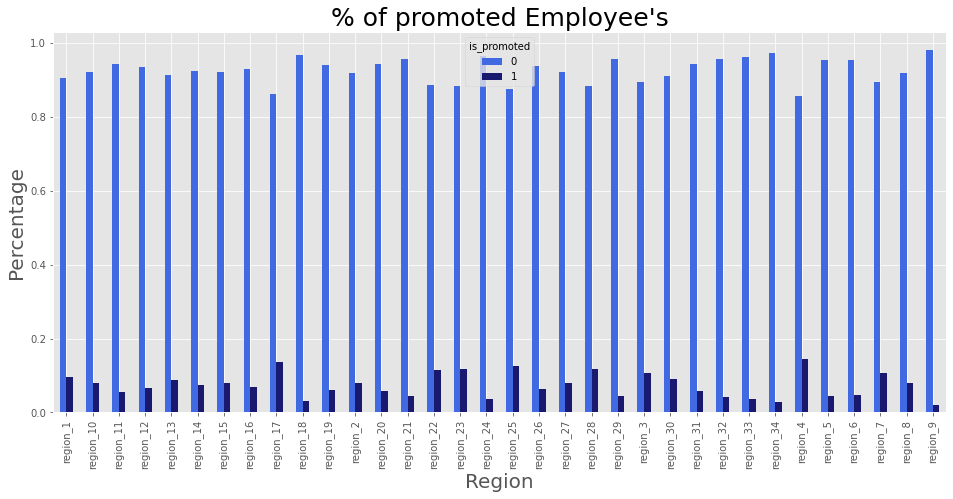

In [18]:
#Percentage of promoted Employee's from each region.

crosstab = pd.crosstab(train["region"],train["is_promoted"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(16,7),color=['royalblue','midnightblue'])
plt.title("% of promoted Employee's",fontsize=25)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Percentage",fontsize=20)
plt.show()

# Education

In [19]:
train["education"].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [20]:
train["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

Text(0.5, 0, 'Education')

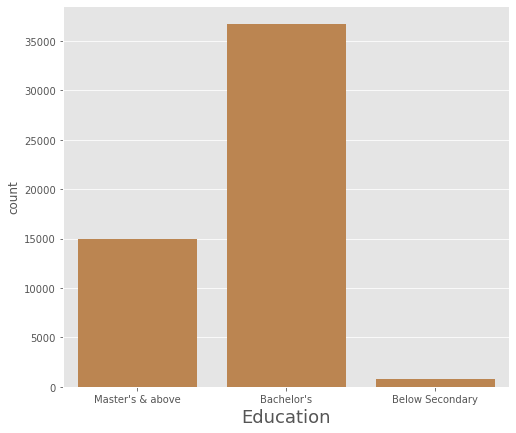

In [21]:
plt.figure(figsize=(8,7))
style.use("ggplot")
sns.countplot(train["education"],color="peru")
plt.xlabel("Education",fontsize=18)

Number of Bachelor's employee's are very high in company

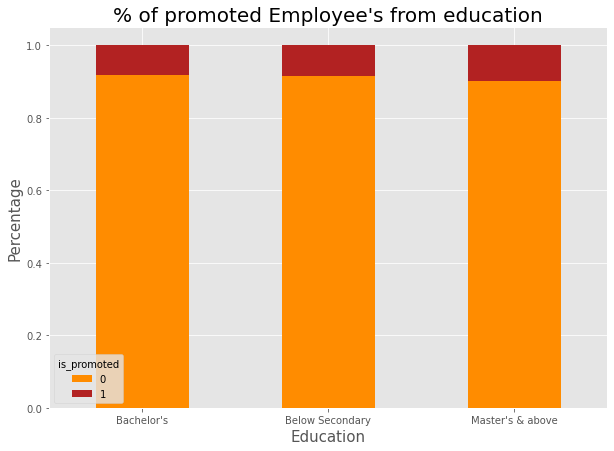

In [22]:
#Percentage of promoted Employee's from each education qualification.

crosstab = pd.crosstab(train["education"],train["is_promoted"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(10,7),stacked=True,color=["darkorange","firebrick"])
plt.title("% of promoted Employee's from education",fontsize=20)
plt.xlabel("Education",fontsize=15)
plt.xticks(rotation=0)
plt.ylabel("Percentage",fontsize=15)
plt.show()

from upper graph can see that Education Master's & above employee's got more promotion in comparison of Bachelor's and below secondary

# Gender

In [23]:
train["gender"].unique()

array(['f', 'm'], dtype=object)

In [24]:
train["gender"].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

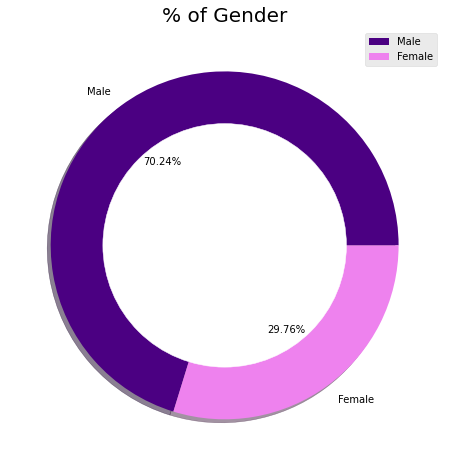

In [25]:
# plot a donut chart for visualizing  employee's gender in percentage.

size = [38496 ,16312]
hollow_circle = plt.Circle((0,0),0.7,color="white")
plt.figure(figsize=(8,8))
plt.pie(size,colors=["indigo","violet"],labels=["Male","Female"],shadow=True,autopct = "%.2f%%")
plt.title('% of Gender', fontsize = 20)
plt.gca().add_artist(hollow_circle)
plt.legend()
plt.show()

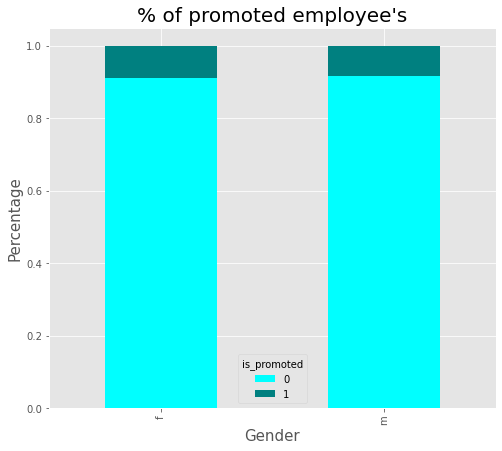

In [26]:
#Percentage of promoted Employee's from both category of gender feature.

crosstab = pd.crosstab(train['gender'],train['is_promoted'])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,7),color=["cyan","teal"])
plt.title("% of promoted employee's",fontsize=20)
plt.xlabel("Gender",fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.show()

female's are very less in comparison of male's but both of gender got equally promotion.

# Recruitment Channel

In [27]:
train["recruitment_channel"].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [28]:
train["recruitment_channel"].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

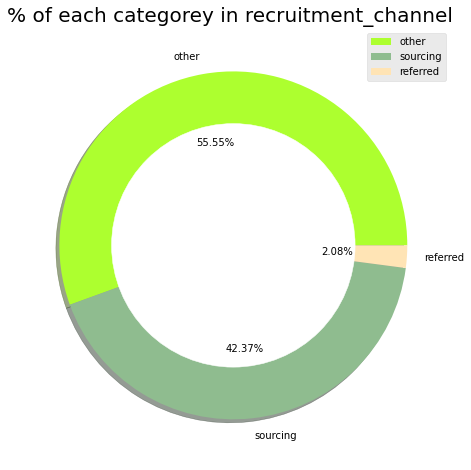

In [29]:
# plot a donut chart for visualizing  employee's recruitment_channel in percentage.

size = [30446,23220,1142]
hollow_circle = plt.Circle((0,0),0.7,color="white")
plt.figure(figsize=(8,8))
plt.pie(size,colors=["greenyellow","darkseagreen","moccasin"],labels=["other","sourcing","referred"],shadow=True,autopct = "%.2f%%")
plt.title('% of each categorey in recruitment_channel ', fontsize = 20)
plt.gca().add_artist(hollow_circle)
plt.legend()
plt.show()

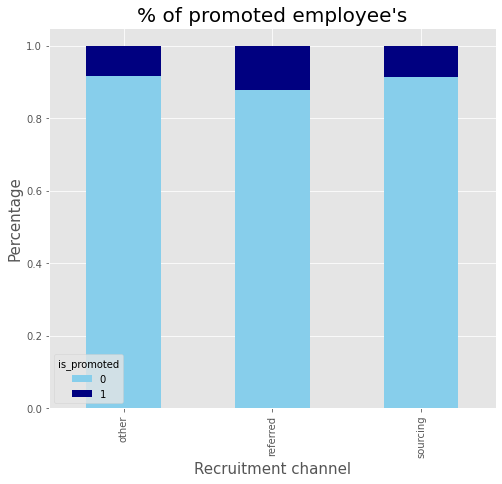

In [30]:
#Percentage of promoted Employee's from each category of recruitment_channel feature.

crosstab = pd.crosstab(train['recruitment_channel'],train['is_promoted'])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,7),color=["skyblue","navy"])
plt.title("% of promoted employee's",fontsize=20)
plt.xlabel("Recruitment channel",fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.show()

Percentage of referred employee's are very less in Dataset but percentage of got selection very high so referrance play important role in promotion

# Awards won

In [31]:
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

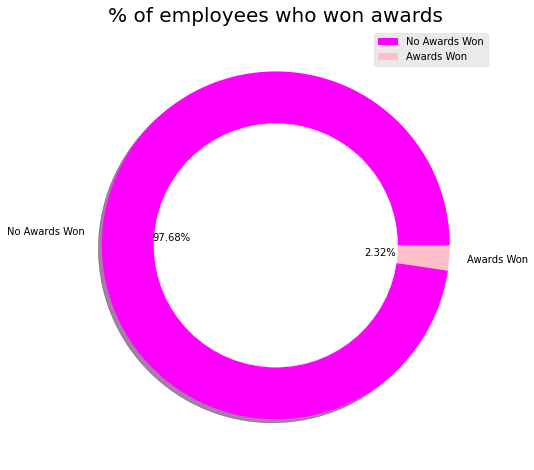

In [32]:
# plot a donut chart for visualizing  employee's awards in percentage.

size = [53538, 1270]
hollow_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.figure(figsize=(8,8))
plt.pie(size, colors = ['magenta', 'pink'] , labels =["No Awards Won", "Awards Won"], shadow = True, autopct = '%.2f%%')
plt.title('% of employees who won awards', fontsize = 20)
plt.gca().add_artist(hollow_circle)
plt.legend()
plt.show()

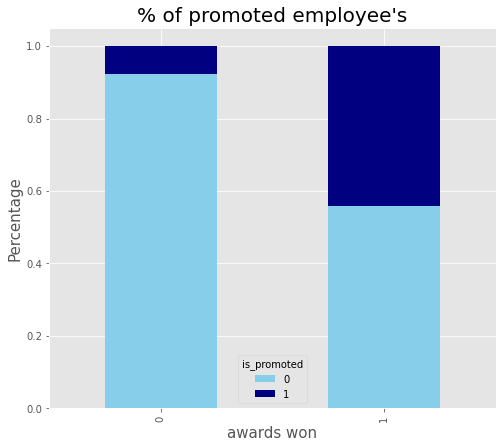

In [33]:
#Percentage of promoted Employee's for both category of awards_won? feature.

crosstab = pd.crosstab(train['awards_won?'],train['is_promoted'])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,7),color=["skyblue","navy"])
plt.title("% of promoted employee's",fontsize=20)
plt.xlabel("awards won",fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.show()

from upper graph its clearly visible that Promoted Employee's are very much high from awards won categorey,so if employee's won awards than the probability for promotion is higher.

# No Of Trainings

In [34]:
train["no_of_trainings"].unique()

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9], dtype=int64)

In [35]:
train["no_of_trainings"].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

Text(0.5, 0, 'No of Trainings')

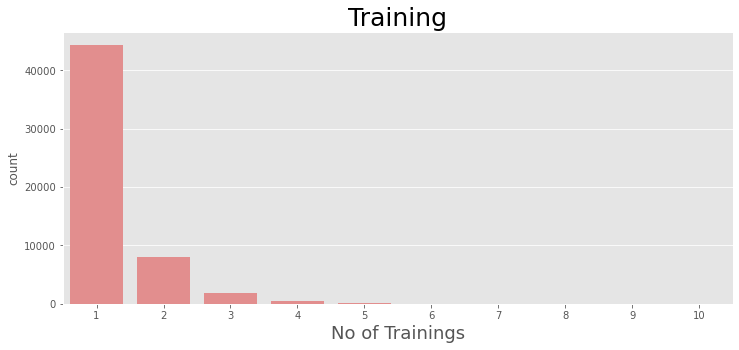

In [36]:
#count for each No of Trainings.

plt.figure(figsize=(12,5))
style.use("ggplot")
sns.countplot(train["no_of_trainings"],color="lightcoral")
plt.title("Training",fontsize=25)
plt.xlabel("No of Trainings",fontsize=18)

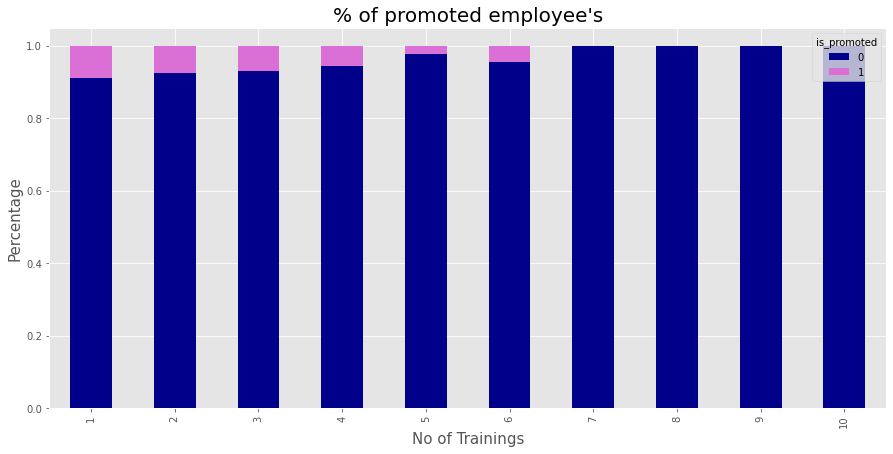

In [37]:
#Percentage of promoted Employee's from each category of no_of_trainings feature.

crosstab = pd.crosstab(train['no_of_trainings'],train['is_promoted'])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(15,7),color=["darkblue","orchid"])
plt.title("% of promoted employee's",fontsize=20)
plt.xlabel("No of Trainings",fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.show()

from upper graph it's clearly visible that No. of Trainings increases than the employee's promotion decreases.

# Age

Text(0.5, 0, 'Age')

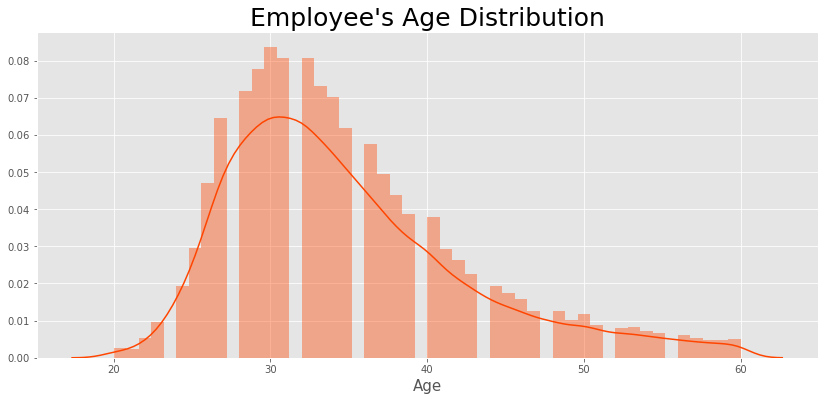

In [38]:
plt.figure(figsize=(14,6))
style.use("ggplot")
sns.distplot(train["age"],color="orangered")
plt.title("Employee's Age Distribution",fontsize=25)
plt.xlabel("Age",fontsize=15)

# Previous year Rating

In [39]:
train["previous_year_rating"].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [40]:
train["previous_year_rating"].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

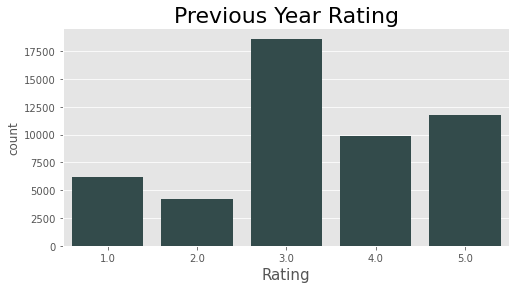

In [41]:
# count for each previous_year_rating.

plt.figure(figsize=(8,4))
style.use("ggplot")
sns.countplot(train["previous_year_rating"],color="darkslategray")
plt.title("Previous Year Rating",fontsize=22)
plt.xlabel("Rating",fontsize=15)
plt.show()

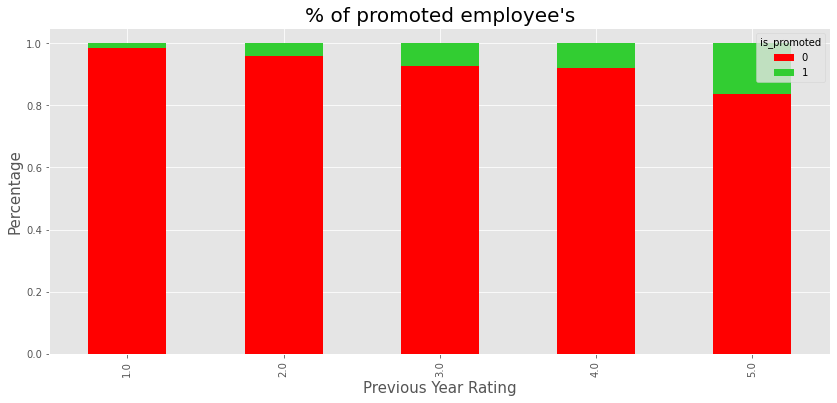

In [42]:
#Percentage of promoted Employee's from each category of previous_year_rating feature.

crosstab = pd.crosstab(train['previous_year_rating'],train['is_promoted'])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(14,6),color=["red","limegreen"])
plt.title("% of promoted employee's",fontsize=20)
plt.xlabel("Previous Year Rating",fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.show()

# Length of Service

In [43]:
train['length_of_service'].unique()

array([ 8,  4,  7, 10,  2,  5,  6,  1,  3, 16,  9, 11, 26, 12, 17, 14, 13,
       19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)

In [44]:
train['length_of_service'].value_counts()

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64

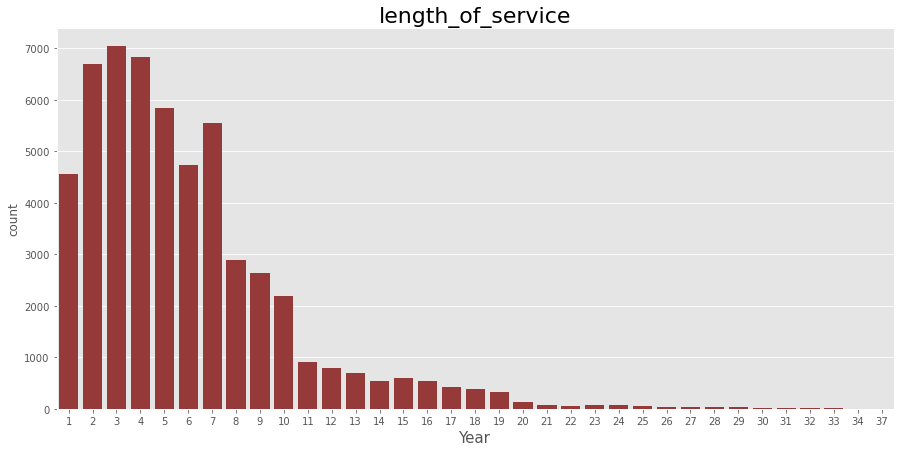

In [45]:
# count for each length_of_service.

plt.figure(figsize=(15,7))
style.use("ggplot")
sns.countplot(train["length_of_service"],color="brown")
plt.title("length_of_service",fontsize=22)
plt.xlabel("Year",fontsize=15)
plt.show()

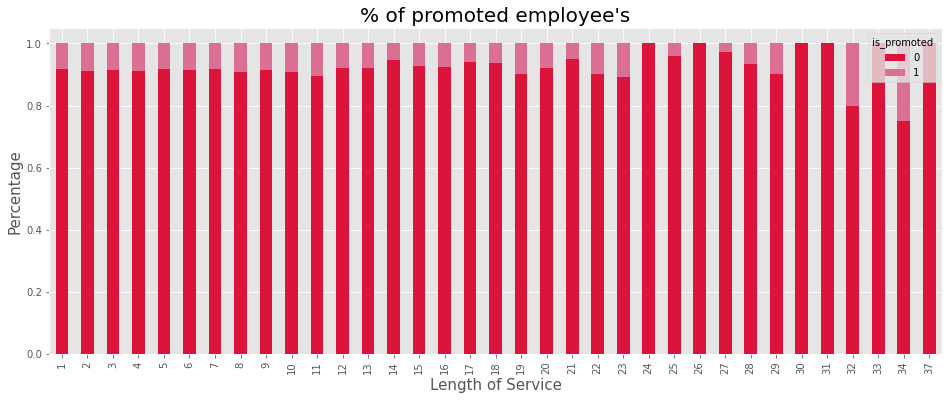

In [46]:
#Percentage of promoted Employee's from each category of length_of_service feature.

crosstab = pd.crosstab(train['length_of_service'],train['is_promoted'])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(16,6),color=["crimson","palevioletred"])
plt.title("% of promoted employee's",fontsize=20)
plt.xlabel("Length of Service",fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.show()

# KPIs_met>80%

In [47]:
train["KPIs_met >80%"].unique()

array([1, 0], dtype=int64)

In [48]:
train["KPIs_met >80%"].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

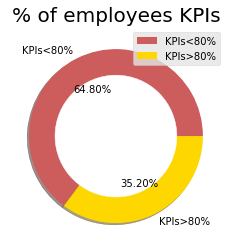

In [49]:
# plot a donut chart for visualizing  employee's KPI's in percentage.

size = [35517 , 19291]
hollow_circle = plt.Circle((0,0),0.7,color = "white")
plt.pie(size , colors=["indianred","gold"],labels=["KPIs<80%","KPIs>80%"],shadow=True,autopct="%.2f%%")
plt.title('% of employees KPIs', fontsize = 20)
plt.gca().add_artist(hollow_circle)
plt.legend()
plt.show()

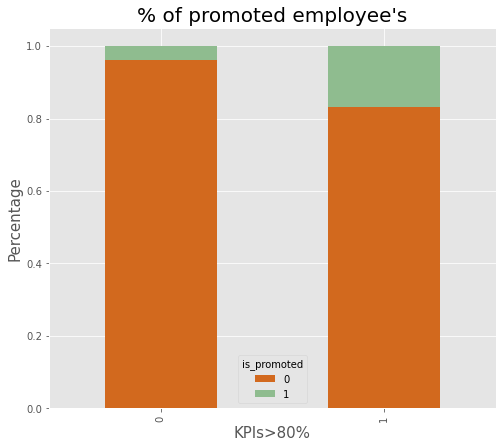

In [50]:
#Percentage of promoted Employee's from both category of KPI's feature.

crosstab = pd.crosstab(train['KPIs_met >80%'],train['is_promoted'])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,7),color=["chocolate","darkseagreen"])
plt.title("% of promoted employee's",fontsize=20)
plt.xlabel("KPIs>80%",fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.show()

from upper graph clearly visible if KPI's>80% than chance for promotion is high.

# Average Training Score

In [51]:
train["avg_training_score"].unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 77, 80, 84, 51, 46, 75, 57, 70,
       68, 79, 44, 72, 61, 48, 58, 87, 47, 52, 88, 71, 65, 62, 53, 78, 91,
       82, 69, 55, 74, 86, 90, 92, 67, 89, 56, 76, 81, 45, 64, 39, 94, 93,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98], dtype=int64)

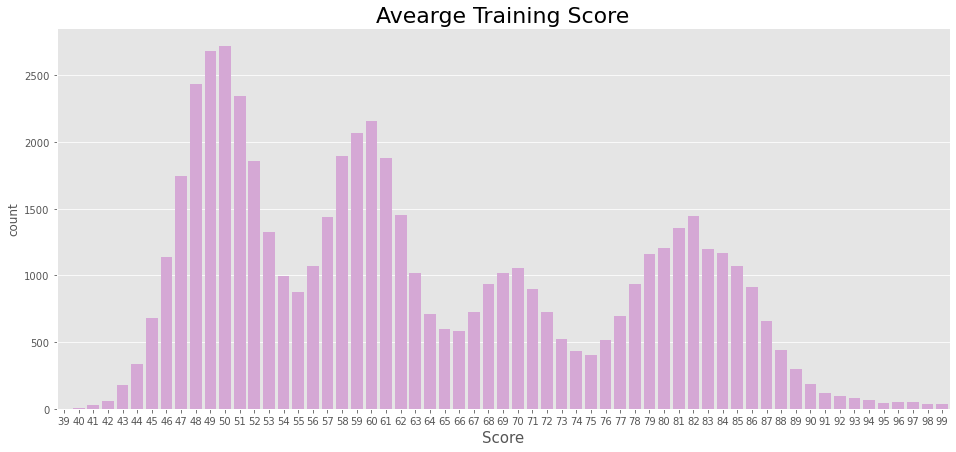

In [52]:
# count for each avg_training_score.

plt.figure(figsize=(16,7))
style.use("ggplot")
sns.countplot(train["avg_training_score"],color="plum")
plt.title("Avearge Training Score",fontsize=22)
plt.xlabel("Score",fontsize=15)
plt.show()

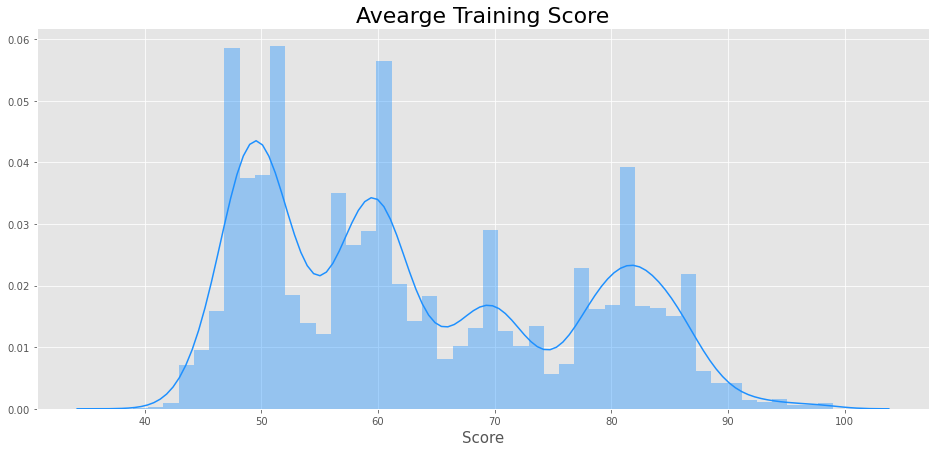

In [53]:
#check distribution of avg_training_score by Histogram.
plt.figure(figsize=(16,7))
style.use("ggplot")
sns.distplot(train["avg_training_score"],color="dodgerblue")
plt.title("Avearge Training Score",fontsize=22)
plt.xlabel("Score",fontsize=15)
plt.show()

# Load Test Dataset.

In [54]:
test = pd.read_csv("test.csv")
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


# Combine Train and Test Datasets

In [55]:
df = pd.concat([train,test])
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


# Handle Missing Values

In [56]:
#check missing values in Datasets.

nan_feature = [feature for feature in df.columns if df[feature].isnull().sum()>1]
nan_feature

['education', 'previous_year_rating', 'is_promoted']

In [57]:
#Education.

print(df["education"].value_counts())
print("Null values in education :",df["education"].isnull().sum())

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64
Null values in education : 3443


In [58]:
#Null values in education consider as different category, Because these null values are related to uneduacted labour class.
df["education"] = df["education"].fillna("lower_class")


In [59]:
#previous_year_rating

print(df["previous_year_rating"].value_counts())
print("Null values in Previous year Rating :",df["previous_year_rating"].isnull().sum())

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64
Null values in Previous year Rating : 5936


In [60]:
#Null values in previous_year_rating consider as 0,Because these null values are related to Fresher's they don't have Previous year rating.

df["previous_year_rating"] = df["previous_year_rating"].fillna(0)

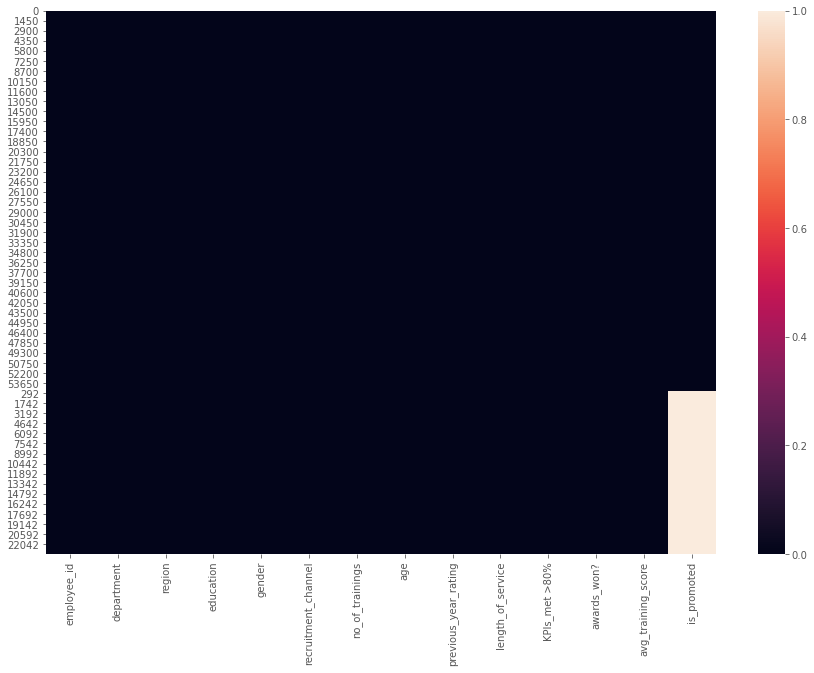

In [61]:
# Again Check Null Values.
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [62]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,0.0,1,0,0,70,NaN


Education features contain a Ordinal values so Change it into Ordinal

In [63]:
education_ordinal = {'lower_class':1,'Below Secondary':2,"Bachelor's":3,"Master's & above":4 }

df["education"] = df["education"].map(education_ordinal)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,4,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,3,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,3,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,3,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,3,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,2,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,3,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,3,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,3,m,sourcing,3,27,0.0,1,0,0,70,NaN


In [64]:
# employee_id is a unique for every employee and employee_id feature don't have any importance in prediction so drop it.
df =df.drop("employee_id",axis=1)
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,4,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,region_22,3,m,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,region_19,3,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,Sales & Marketing,region_23,3,m,other,2,39,1.0,10,0,0,50,0.0
4,Technology,region_26,3,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,2,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,Technology,region_25,3,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,HR,region_16,3,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,Procurement,region_31,3,m,sourcing,3,27,0.0,1,0,0,70,NaN


# Handle Categorical Features

In [65]:
#Department Feature having categorical values, so change it into mean encoding.

department = df.groupby(["department"])["is_promoted"].mean().sort_values()
df["department"] = df["department"].map(department)

In [66]:
#Region Feature having categorical values, so change it into mean encoding.

region = df.groupby(["region"])["is_promoted"].mean().sort_values()
df["region"] = df["region"].map(region)
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.072031,0.106546,4,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,0.090148,0.114188,3,m,other,1,30,5.0,4,0,0,60,0.0
2,0.072031,0.060641,3,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,0.072031,0.116596,3,m,other,2,39,1.0,10,0,0,50,0.0
4,0.107593,0.063274,3,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.051011,0.080126,2,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,0.107593,0.125763,3,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,0.056245,0.069625,3,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,0.096386,0.056848,3,m,sourcing,3,27,0.0,1,0,0,70,NaN


In [67]:
#Recruitment_channel Feature having categorical values, so change it into mean encoding.

recruitment = df.groupby(["recruitment_channel"])["is_promoted"].mean().sort_values()
df["recruitment_channel"] = df["recruitment_channel"].map(recruitment)
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.072031,0.106546,4,f,0.085013,1,35,5.0,8,1,0,49,0.0
1,0.090148,0.114188,3,m,0.083952,1,30,5.0,4,0,0,60,0.0
2,0.072031,0.060641,3,m,0.085013,1,34,3.0,7,0,0,50,0.0
3,0.072031,0.116596,3,m,0.083952,2,39,1.0,10,0,0,50,0.0
4,0.107593,0.063274,3,m,0.083952,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.051011,0.080126,2,m,0.085013,1,24,3.0,1,0,0,61,NaN
23486,0.107593,0.125763,3,m,0.085013,1,31,3.0,7,0,0,74,NaN
23487,0.056245,0.069625,3,f,0.085013,1,26,4.0,4,0,0,50,NaN
23488,0.096386,0.056848,3,m,0.085013,3,27,0.0,1,0,0,70,NaN


Make new feature service_start_age  with the help of age and length_of_service, because both features don't have much effect on prediciton accuracy, but new feature increasing the acc 

In [68]:
df["service_start_age"] = df["age"]-df["length_of_service"]

df = df.drop(["age","length_of_service"],axis=1)
df

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,service_start_age
0,0.072031,0.106546,4,f,0.085013,1,5.0,1,0,49,0.0,27
1,0.090148,0.114188,3,m,0.083952,1,5.0,0,0,60,0.0,26
2,0.072031,0.060641,3,m,0.085013,1,3.0,0,0,50,0.0,27
3,0.072031,0.116596,3,m,0.083952,2,1.0,0,0,50,0.0,29
4,0.107593,0.063274,3,m,0.083952,1,3.0,0,0,73,0.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.051011,0.080126,2,m,0.085013,1,3.0,0,0,61,NaN,23
23486,0.107593,0.125763,3,m,0.085013,1,3.0,0,0,74,NaN,24
23487,0.056245,0.069625,3,f,0.085013,1,4.0,0,0,50,NaN,22
23488,0.096386,0.056848,3,m,0.085013,3,0.0,0,0,70,NaN,26


In [69]:
df.describe()

,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,service_start_age
count,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000,78298.000000
mean,0.085111,0.085137,3.170681,0.085152,1.253378,3.079593,0.354032,0.023053,63.349664,0.085170,28.948645
std,0.014686,0.026101,0.659931,0.005169,0.606766,1.499173,0.478222,0.150073,13.383664,0.279137,5.853208
min,0.051011,0.019048,1.000000,0.083952,1.000000,0.000000,0.000000,0.000000,39.000000,0.000000,17.000000
25%,0.072031,0.069625,3.000000,0.083952,1.000000,2.000000,0.000000,0.000000,51.000000,0.000000,25.000000
50%,0.090148,0.080126,3.000000,0.083952,1.000000,3.000000,0.000000,0.000000,60.000000,0.000000,27.000000
75%,0.096386,0.106546,4.000000,0.085013,1.000000,4.000000,1.000000,0.000000,76.000000,0.000000,31.000000
max,0.107593,0.144451,4.000000,0.120841,10.000000,5.000000,1.000000,1.000000,99.000000,1.000000,58.000000


# Check Outliers and Distribution.

service_start_age FEATURE

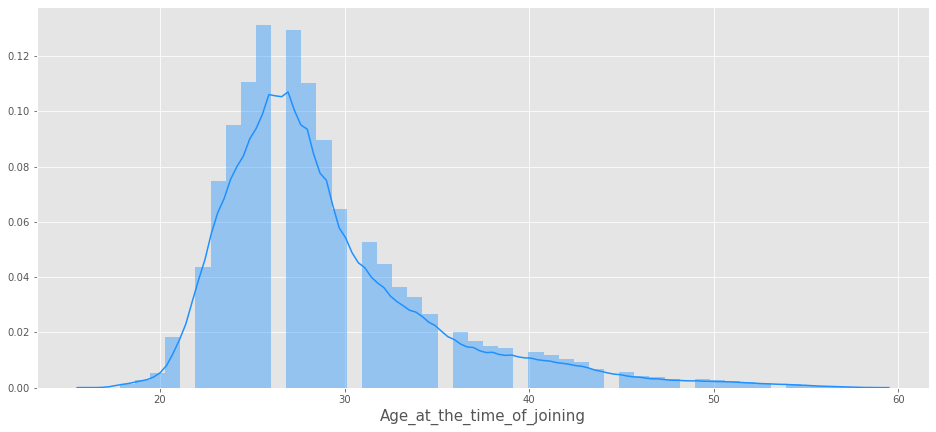

In [70]:
#check distribution of service_start_age by Histogram.
plt.figure(figsize=(16,7))
style.use("ggplot")
sns.distplot(df["service_start_age"],color="dodgerblue")
plt.xlabel("Age_at_the_time_of_joining",fontsize=15)
plt.show()

service_start_age feature distribution seem Normally Distributed for detect outlier  apply (mean-+3std) 

In [71]:
lower_boundary = df["service_start_age"].mean()-3*df["service_start_age"].std()
lower_boundary

11.389021429086181

In [72]:
upper_boundary = df["service_start_age"].mean()+3*df["service_start_age"].std()
upper_boundary

46.508268412289084

more than 46.508 consider as outlier (let 57.79=58)

In [73]:
df[df["service_start_age"]>=46.508]

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,service_start_age
33,0.090148,0.080126,3,m,0.085013,2,4.0,0,0,58,0.0,51
446,0.072031,0.080126,3,m,0.083952,1,5.0,0,0,45,0.0,51
464,0.090148,0.080126,3,f,0.083952,1,5.0,1,0,56,0.0,56
472,0.072031,0.106546,3,m,0.085013,1,4.0,0,0,50,0.0,54
482,0.090148,0.080126,4,m,0.083952,2,4.0,1,0,58,0.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
23110,0.072031,0.080126,4,f,0.085013,1,1.0,0,0,47,NaN,52
23174,0.072031,0.080126,3,m,0.083952,1,5.0,0,0,47,NaN,51
23234,0.056245,0.080126,4,m,0.085013,1,3.0,0,0,52,NaN,55
23279,0.072031,0.080126,4,f,0.083952,1,5.0,0,0,50,NaN,48


In [74]:
df.loc[df["service_start_age"]>=46.508,"service_start_age"]=46.508

In [75]:
df[df["service_start_age"]==46.508]

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,service_start_age
33,0.090148,0.080126,3,m,0.085013,2,4.0,0,0,58,0.0,46.508
446,0.072031,0.080126,3,m,0.083952,1,5.0,0,0,45,0.0,46.508
464,0.090148,0.080126,3,f,0.083952,1,5.0,1,0,56,0.0,46.508
472,0.072031,0.106546,3,m,0.085013,1,4.0,0,0,50,0.0,46.508
482,0.090148,0.080126,4,m,0.083952,2,4.0,1,0,58,0.0,46.508
...,...,...,...,...,...,...,...,...,...,...,...,...
23110,0.072031,0.080126,4,f,0.085013,1,1.0,0,0,47,NaN,46.508
23174,0.072031,0.080126,3,m,0.083952,1,5.0,0,0,47,NaN,46.508
23234,0.056245,0.080126,4,m,0.085013,1,3.0,0,0,52,NaN,46.508
23279,0.072031,0.080126,4,f,0.083952,1,5.0,0,0,50,NaN,46.508


In [76]:
df["service_start_age"].unique()

array([27.   , 26.   , 29.   , 43.   , 24.   , 23.   , 32.   , 44.   ,
       30.   , 33.   , 28.   , 25.   , 22.   , 46.508, 36.   , 37.   ,
       21.   , 39.   , 18.   , 34.   , 35.   , 45.   , 40.   , 31.   ,
       19.   , 38.   , 42.   , 20.   , 41.   , 46.   , 17.   ])

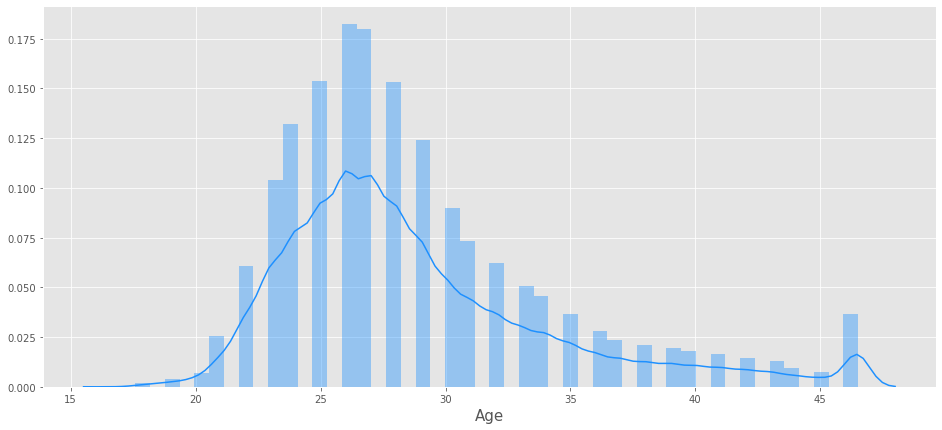

In [77]:
# Again check distribution of service_start_age by Histogram.
plt.figure(figsize=(16,7))
style.use("ggplot")
sns.distplot(df["service_start_age"],color="dodgerblue")
plt.xlabel("Age",fontsize=15)
plt.show()

In [78]:
import scipy.stats as st
import pylab

In [79]:
# Function for check Distribution by QQ-plot

def qq_plot(data_frame,feature_name):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    st.probplot(data_frame[feature_name],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.show()

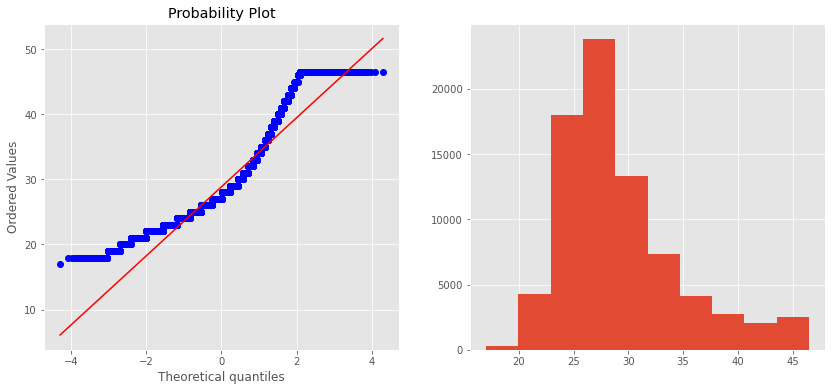

In [80]:
#check Normally Distribution by QQ-Plot.

qq_plot(df,"service_start_age")

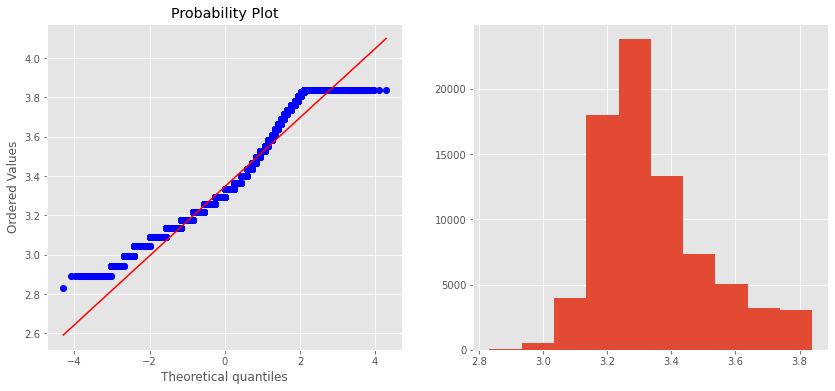

In [81]:
#Logarithmic Transformation.

df_copy = df.copy()
df_copy["service_start_age_log"] =  np.log(df_copy["service_start_age"])
qq_plot(df_copy,"service_start_age_log")

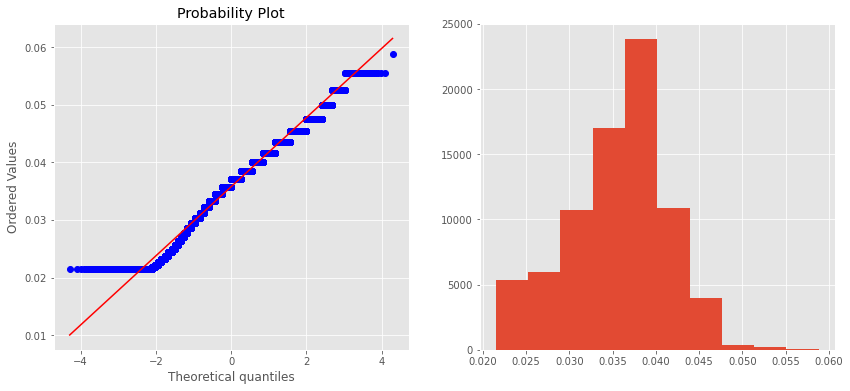

In [82]:
#Reciprocal Transformation

df_copy = df.copy()
df_copy["service_start_age_reciprocal"] =  1/(df_copy["service_start_age"])
qq_plot(df_copy,"service_start_age_reciprocal")

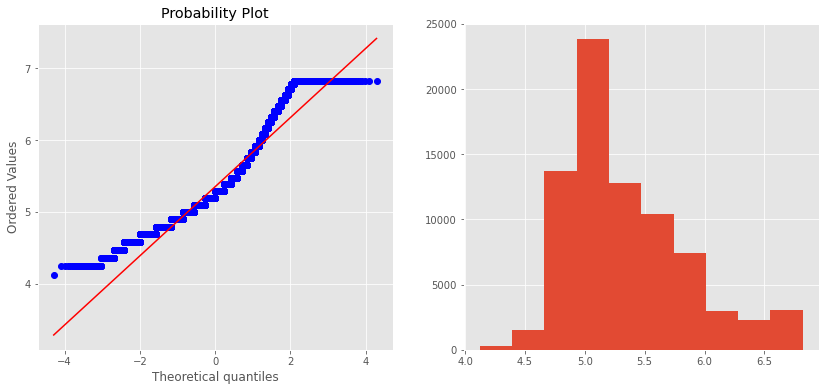

In [83]:
#Square root Transformation

df_copy = df.copy()
df_copy["service_start_age_root"] =  df_copy["service_start_age"]**(1/2)
qq_plot(df_copy,"service_start_age_root")

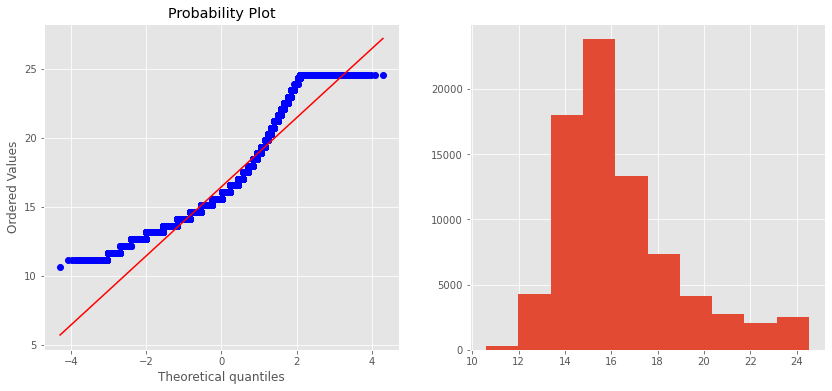

In [84]:
#Exponential Transformation

df_copy = df.copy()
df_copy["service_start_age_expo"] =  df_copy["service_start_age"]**(1/1.2)
qq_plot(df_copy,"service_start_age_expo")

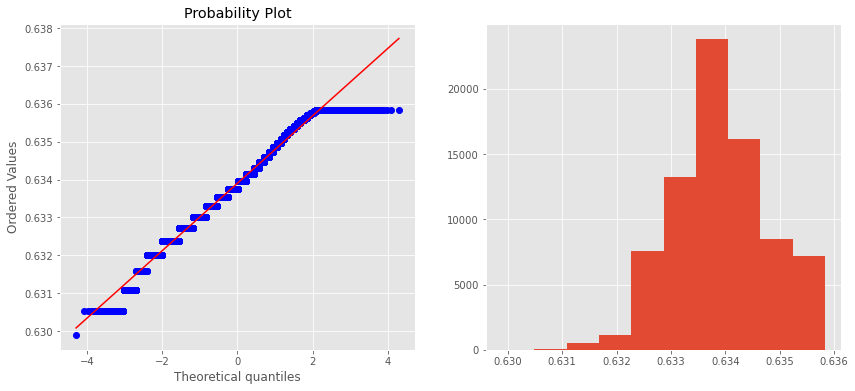

In [85]:
#Boxcox Transformation

df_copy = df.copy()
df_copy["service_start_age_boxcox"],parameter = st.boxcox(df_copy["service_start_age"])
qq_plot(df_copy,"service_start_age_boxcox")

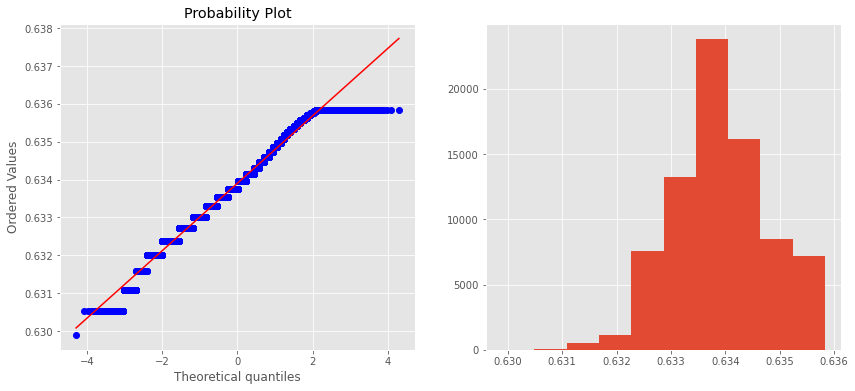

In [86]:
# after boxcox and reciprocal transformation distribution seems to Normally Distributed. so apply on main dataset
df["service_start_age"],parameter = st.boxcox(df["service_start_age"])
qq_plot(df,"service_start_age")

In [87]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,service_start_age
0,0.072031,0.106546,4,f,0.085013,1,5.0,1,0,49,0.0,0.633757
1,0.090148,0.114188,3,m,0.083952,1,5.0,0,0,60,0.0,0.633536
2,0.072031,0.060641,3,m,0.085013,1,3.0,0,0,50,0.0,0.633757
3,0.072031,0.116596,3,m,0.083952,2,1.0,0,0,50,0.0,0.634141
4,0.107593,0.063274,3,m,0.083952,1,3.0,0,0,73,0.0,0.635633
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.051011,0.080126,2,m,0.085013,1,3.0,0,0,61,NaN,0.632722
23486,0.107593,0.125763,3,m,0.085013,1,3.0,0,0,74,NaN,0.633022
23487,0.056245,0.069625,3,f,0.085013,1,4.0,0,0,50,NaN,0.632385
23488,0.096386,0.056848,3,m,0.085013,3,0.0,0,0,70,NaN,0.633536


Average Training Score Feature

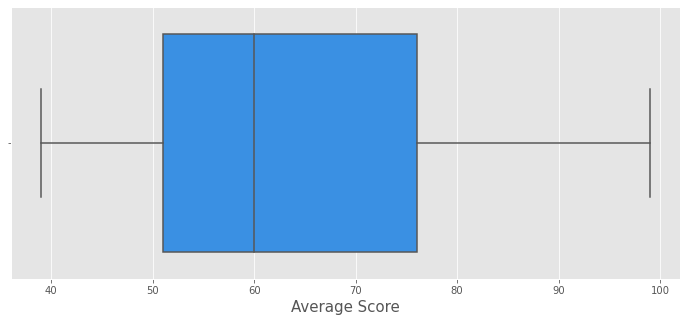

In [88]:
#check outliers in avg_training_score feature by Boxplot.
plt.figure(figsize=(12,5))
style.use("ggplot")
sns.boxplot(train["avg_training_score"],color="dodgerblue")
plt.xlabel("Average Score",fontsize=15)
plt.show()

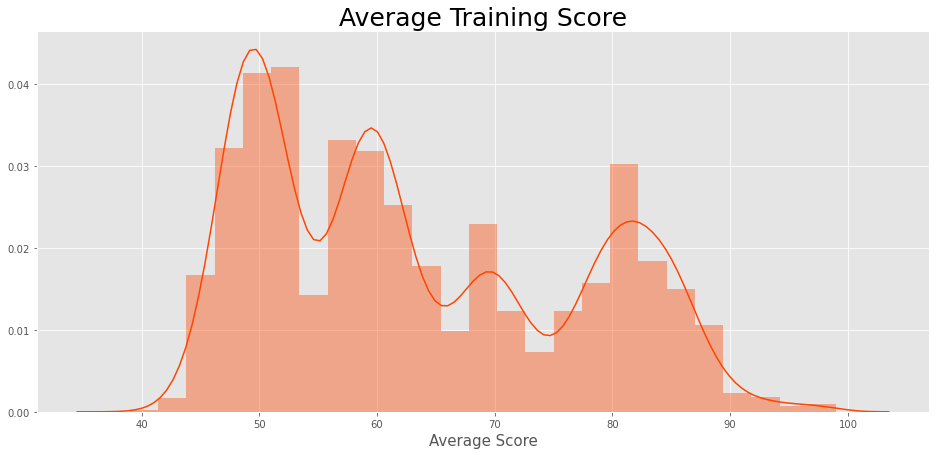

In [89]:
#check distribution of avg_training_score by Histogram.
plt.figure(figsize=(16,7))
style.use("ggplot")
sns.distplot(df["avg_training_score"],color="orangered",bins=25)
plt.title("Average Training Score",fontsize=25)
plt.xlabel("Average Score",fontsize=15)
plt.show()

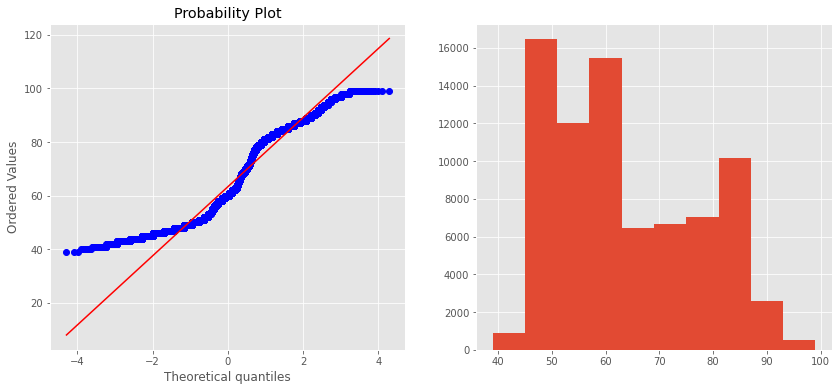

In [90]:
#check Normally Distribution by QQ-Plot.

qq_plot(df,"avg_training_score")

Apply some Transformation to make Normal Distribution.

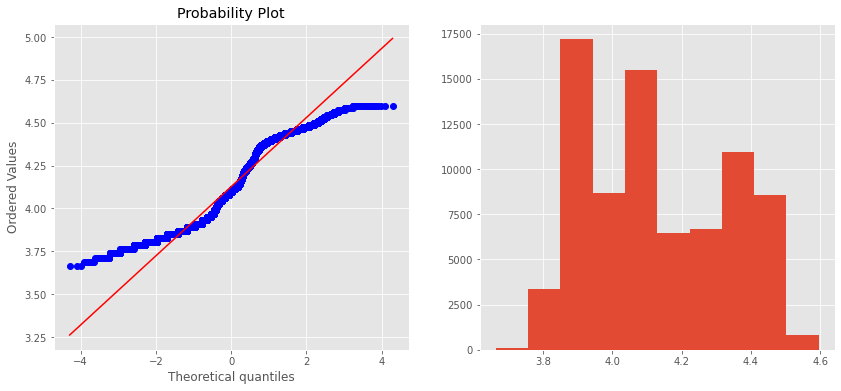

In [91]:
#Logarithmic Transformation.

df_copy = df.copy()
df_copy["avg_training_score_log"] =  np.log(df_copy["avg_training_score"])
qq_plot(df_copy,"avg_training_score_log")

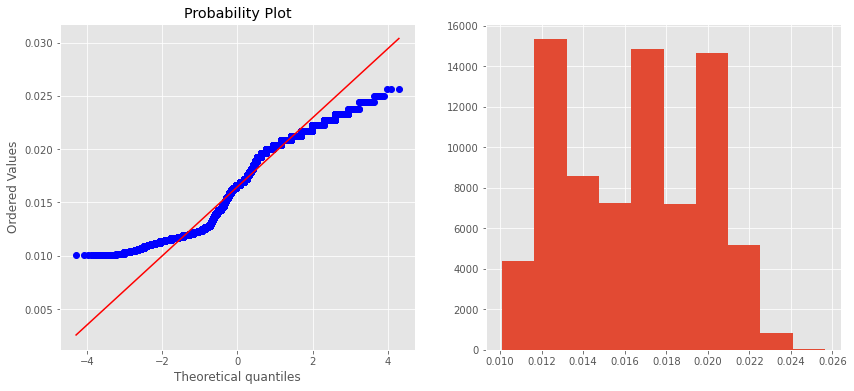

In [92]:
#Reciprocal Transformation

df_copy = df.copy()
df_copy["avg_training_score_reciprocal"] =  1/(df_copy["avg_training_score"])
qq_plot(df_copy,"avg_training_score_reciprocal")

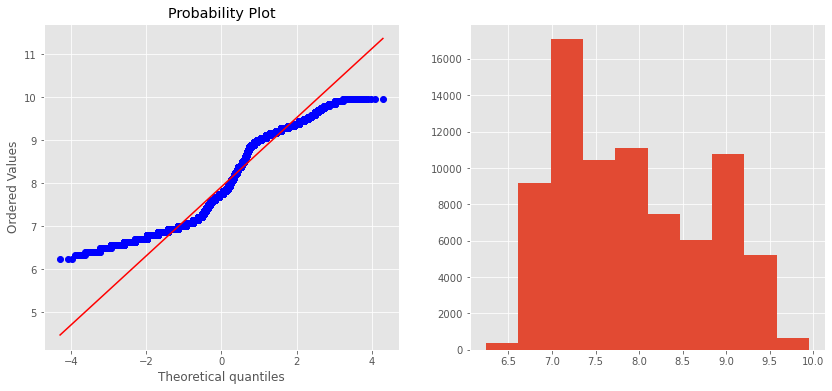

In [93]:
#Square root Transformation

df_copy = df.copy()
df_copy["avg_training_score_root"] =  df_copy["avg_training_score"]**(1/2)
qq_plot(df_copy,"avg_training_score_root")

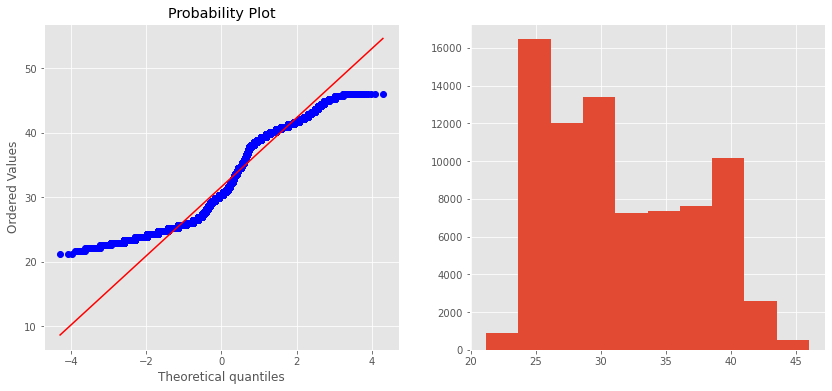

In [94]:
#Exponential Transformation

df_copy = df.copy()
df_copy["avg_training_score_expo"] =  df_copy["avg_training_score"]**(1/1.2)
qq_plot(df_copy,"avg_training_score_expo")

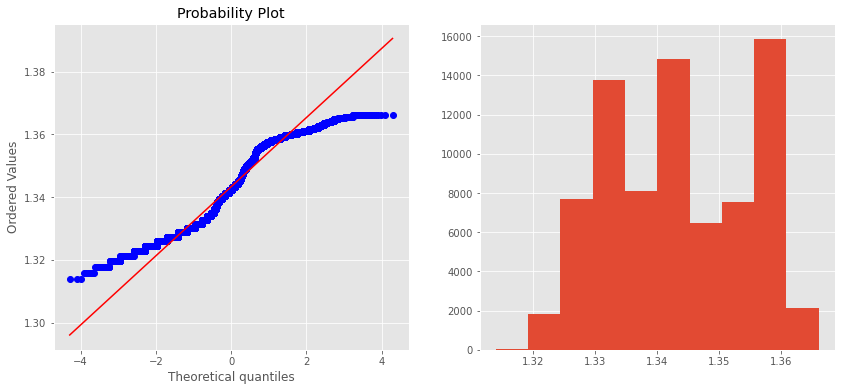

In [95]:
#Boxcox Transformation

df_copy = df.copy()
df_copy["avg_training_score_boxcox"],parameter = st.boxcox(df_copy["avg_training_score"])
qq_plot(df_copy,"avg_training_score_boxcox")

After all transformation Distribution doesn't seem to better than before , so don't need to apply transformation

In [96]:
#Categorical features change into Dummies variables.

df = pd.get_dummies(df,drop_first=True)
df

,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,service_start_age,gender_m
0,0.072031,0.106546,4,0.085013,1,5.0,1,0,49,0.0,0.633757,0
1,0.090148,0.114188,3,0.083952,1,5.0,0,0,60,0.0,0.633536,1
2,0.072031,0.060641,3,0.085013,1,3.0,0,0,50,0.0,0.633757,1
3,0.072031,0.116596,3,0.083952,2,1.0,0,0,50,0.0,0.634141,1
4,0.107593,0.063274,3,0.083952,1,3.0,0,0,73,0.0,0.635633,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.051011,0.080126,2,0.085013,1,3.0,0,0,61,NaN,0.632722,1
23486,0.107593,0.125763,3,0.085013,1,3.0,0,0,74,NaN,0.633022,1
23487,0.056245,0.069625,3,0.085013,1,4.0,0,0,50,NaN,0.632385,0
23488,0.096386,0.056848,3,0.085013,3,0.0,0,0,70,NaN,0.633536,1


# Split Train and Test Datasets.

In [97]:
train = df.iloc[:54808,:]
train

,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,service_start_age,gender_m
0,0.072031,0.106546,4,0.085013,1,5.0,1,0,49,0.0,0.633757,0
1,0.090148,0.114188,3,0.083952,1,5.0,0,0,60,0.0,0.633536,1
2,0.072031,0.060641,3,0.085013,1,3.0,0,0,50,0.0,0.633757,1
3,0.072031,0.116596,3,0.083952,2,1.0,0,0,50,0.0,0.634141,1
4,0.107593,0.063274,3,0.083952,1,3.0,0,0,73,0.0,0.635633,1
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0.107593,0.074970,3,0.085013,1,3.0,0,0,78,0.0,0.634462,1
54804,0.090148,0.078963,4,0.083952,1,2.0,0,0,56,0.0,0.634462,0
54805,0.095665,0.095082,3,0.083952,1,5.0,1,0,79,0.0,0.633022,1
54806,0.072031,0.019048,1,0.085013,1,1.0,0,0,45,0.0,0.633757,1


In [98]:
test = df.iloc[54808:,:]
test

,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,service_start_age,gender_m
0,0.107593,0.063274,3,0.085013,1,0.0,1,0,77,NaN,0.632722,1
1,0.056245,0.144451,3,0.083952,1,3.0,0,0,51,NaN,0.633536,0
2,0.072031,0.086858,3,0.083952,1,1.0,0,0,47,NaN,0.633757,1
3,0.096386,0.080126,3,0.083952,3,2.0,0,0,65,NaN,0.632385,0
4,0.081230,0.043260,3,0.085013,1,4.0,0,0,61,NaN,0.632722,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.051011,0.080126,2,0.085013,1,3.0,0,0,61,NaN,0.632722,1
23486,0.107593,0.125763,3,0.085013,1,3.0,0,0,74,NaN,0.633022,1
23487,0.056245,0.069625,3,0.085013,1,4.0,0,0,50,NaN,0.632385,0
23488,0.096386,0.056848,3,0.085013,3,0.0,0,0,70,NaN,0.633536,1


In [99]:
#Split Independent features and Dependent features from train dataset.
df_x = train.drop(["is_promoted"],axis=1)
df_y = train["is_promoted"]

In [100]:
test= test.drop(["is_promoted"],axis=1)
test

,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,service_start_age,gender_m
0,0.107593,0.063274,3,0.085013,1,0.0,1,0,77,0.632722,1
1,0.056245,0.144451,3,0.083952,1,3.0,0,0,51,0.633536,0
2,0.072031,0.086858,3,0.083952,1,1.0,0,0,47,0.633757,1
3,0.096386,0.080126,3,0.083952,3,2.0,0,0,65,0.632385,0
4,0.081230,0.043260,3,0.085013,1,4.0,0,0,61,0.632722,1
...,...,...,...,...,...,...,...,...,...,...,...
23485,0.051011,0.080126,2,0.085013,1,3.0,0,0,61,0.632722,1
23486,0.107593,0.125763,3,0.085013,1,3.0,0,0,74,0.633022,1
23487,0.056245,0.069625,3,0.085013,1,4.0,0,0,50,0.632385,0
23488,0.096386,0.056848,3,0.085013,3,0.0,0,0,70,0.633536,1


# Over Sampling

In [101]:
#Because Dataset is imbalance so apply under sampling techniques to make balanced data,

from imblearn.over_sampling import SMOTE

In [102]:
smote_sampling = SMOTE()
df_x,df_y =  smote_sampling.fit_sample(df_x,df_y)

In [103]:
df_x

,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,service_start_age,gender_m
0,0.072031,0.106546,4,0.085013,1,5.00000,1,0,49,0.633757,0
1,0.090148,0.114188,3,0.083952,1,5.00000,0,0,60,0.633536,1
2,0.072031,0.060641,3,0.085013,1,3.00000,0,0,50,0.633757,1
3,0.072031,0.116596,3,0.083952,2,1.00000,0,0,50,0.634141,1
4,0.107593,0.063274,3,0.083952,1,3.00000,0,0,73,0.635633,1
...,...,...,...,...,...,...,...,...,...,...,...
100275,0.100891,0.144451,3,0.084360,2,3.00000,0,0,79,0.633672,0
100276,0.076871,0.060999,2,0.083952,1,0.00000,0,0,97,0.634266,1
100277,0.084345,0.079754,2,0.084642,1,5.00000,0,0,72,0.632549,1
100278,0.096810,0.080024,3,0.083952,1,4.00000,1,0,84,0.632821,0


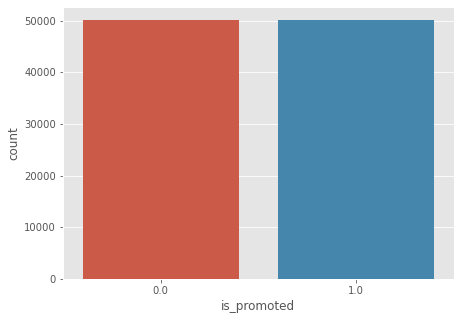

In [104]:
# Check again dataset is balanced or not.

plt.figure(figsize=(7,5))
sns.countplot(df_y)

# Feature Scaling

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaling =  MinMaxScaler()
scaling_data = scaling.fit_transform(df_x)

In [107]:
df_x = pd.DataFrame(scaling_data,columns=df_x.columns)
df_x

,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,service_start_age,gender_m
0,0.371498,0.697732,1.000000,0.028762,0.000000,1.000000,1.0,0.0,0.166667,0.650118,0.0
1,0.691687,0.758674,0.666667,0.000000,0.000000,1.000000,0.0,0.0,0.350000,0.612931,1.0
2,0.371498,0.331675,0.666667,0.028762,0.000000,0.600000,0.0,0.0,0.183333,0.650118,1.0
3,0.371498,0.777875,0.666667,0.000000,0.111111,0.200000,0.0,0.0,0.183333,0.714773,1.0
4,1.000000,0.352676,0.666667,0.000000,0.000000,0.600000,0.0,0.0,0.566667,0.965992,1.0
...,...,...,...,...,...,...,...,...,...,...,...
100275,0.881545,1.000000,0.666667,0.011051,0.111111,0.600000,0.0,0.0,0.666667,0.635831,0.0
100276,0.457040,0.334533,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.966667,0.735903,1.0
100277,0.589123,0.484088,0.333333,0.018718,0.000000,1.000000,0.0,0.0,0.550000,0.446672,1.0
100278,0.809421,0.486242,0.666667,0.000000,0.000000,0.800000,1.0,0.0,0.750000,0.492475,0.0


In [108]:
df_x.columns

Index(['department', 'region', 'education', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'service_start_age', 'gender_m'],
      dtype='object')

In [109]:
#similarly apply on test dataset,

scaling_test = scaling.transform(test)
test = pd.DataFrame(scaling_test,columns=test.columns)
test.columns

Index(['department', 'region', 'education', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'service_start_age', 'gender_m'],
      dtype='object')

In [110]:
df_x

,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,service_start_age,gender_m
0,0.371498,0.697732,1.000000,0.028762,0.000000,1.000000,1.0,0.0,0.166667,0.650118,0.0
1,0.691687,0.758674,0.666667,0.000000,0.000000,1.000000,0.0,0.0,0.350000,0.612931,1.0
2,0.371498,0.331675,0.666667,0.028762,0.000000,0.600000,0.0,0.0,0.183333,0.650118,1.0
3,0.371498,0.777875,0.666667,0.000000,0.111111,0.200000,0.0,0.0,0.183333,0.714773,1.0
4,1.000000,0.352676,0.666667,0.000000,0.000000,0.600000,0.0,0.0,0.566667,0.965992,1.0
...,...,...,...,...,...,...,...,...,...,...,...
100275,0.881545,1.000000,0.666667,0.011051,0.111111,0.600000,0.0,0.0,0.666667,0.635831,0.0
100276,0.457040,0.334533,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.966667,0.735903,1.0
100277,0.589123,0.484088,0.333333,0.018718,0.000000,1.000000,0.0,0.0,0.550000,0.446672,1.0
100278,0.809421,0.486242,0.666667,0.000000,0.000000,0.800000,1.0,0.0,0.750000,0.492475,0.0


# Feature Selection

In [111]:
categorical_feature = df_x[["department","region","education","recruitment_channel","KPIs_met >80%","awards_won?","gender_m"]]
categorical_feature

,department,region,education,recruitment_channel,KPIs_met >80%,awards_won?,gender_m
0,0.371498,0.697732,1.000000,0.028762,1.0,0.0,0.0
1,0.691687,0.758674,0.666667,0.000000,0.0,0.0,1.0
2,0.371498,0.331675,0.666667,0.028762,0.0,0.0,1.0
3,0.371498,0.777875,0.666667,0.000000,0.0,0.0,1.0
4,1.000000,0.352676,0.666667,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...
100275,0.881545,1.000000,0.666667,0.011051,0.0,0.0,0.0
100276,0.457040,0.334533,0.333333,0.000000,0.0,0.0,1.0
100277,0.589123,0.484088,0.333333,0.018718,0.0,0.0,1.0
100278,0.809421,0.486242,0.666667,0.000000,1.0,0.0,0.0


In [112]:
continuous_feature = df_x[["no_of_trainings","previous_year_rating","avg_training_score","service_start_age"]]

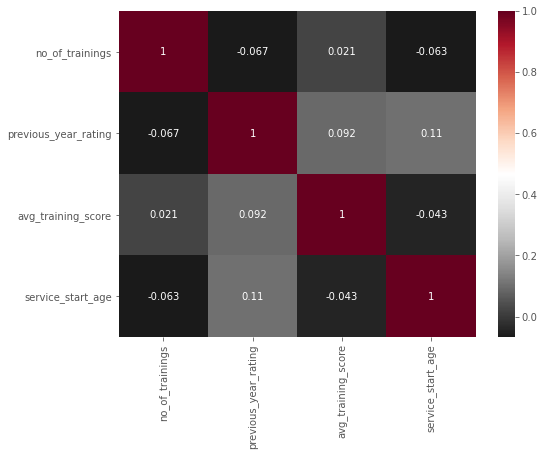

In [113]:
# use pearson correlation coefficient for continuous feature selection 
plt.figure(figsize=(8,6))
sns.heatmap(continuous_feature.corr(),annot=True,cmap="RdGy_r")

In [114]:
#Apply chi2 test on categorical feature for feature selection.

from sklearn.feature_selection import chi2

chi2_test = chi2(categorical_feature,df_y)
chi2_test = pd.DataFrame(chi2_test)
chi2_test.columns = categorical_feature.columns
chi2_test = chi2_test.T
chi2_test.columns = ["chi2_score","p_value"]
chi2_test

,chi2_score,p_value
department,108.927416,1.683388e-25
region,206.281465,8.895668e-47
education,8.895802,2.858270e-03
recruitment_channel,7.783391,5.272874e-03
KPIs_met >80%,6578.932282,0.000000e+00
awards_won?,1480.390662,0.000000e+00
gender_m,61.801261,3.799310e-15


In [115]:
sort_p_score = chi2_test.sort_values("p_value")
sort_p_score

,chi2_score,p_value
KPIs_met >80%,6578.932282,0.000000e+00
awards_won?,1480.390662,0.000000e+00
region,206.281465,8.895668e-47
department,108.927416,1.683388e-25
gender_m,61.801261,3.799310e-15
education,8.895802,2.858270e-03
recruitment_channel,7.783391,5.272874e-03


In [116]:
# select those feature has p_value less than 0.05

impo_feature = sort_p_score[sort_p_score["p_value"]<0.05]
impo_feature

,chi2_score,p_value
KPIs_met >80%,6578.932282,0.000000e+00
awards_won?,1480.390662,0.000000e+00
region,206.281465,8.895668e-47
department,108.927416,1.683388e-25
gender_m,61.801261,3.799310e-15
education,8.895802,2.858270e-03
recruitment_channel,7.783391,5.272874e-03


all categorical features are important

# Model Building

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [118]:
# split train validation data.
x_train,x_valid,y_train,y_valid = train_test_split(df_x,df_y,test_size=0.25,random_state=5)

Apply Logistic Regression

In [119]:
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [120]:
# prediciton on validation data
logit_predicition = logit_model.predict(x_valid)

In [121]:
# Accuracy Score.
accuracy_score(y_valid,logit_predicition)

0.7306342241723175

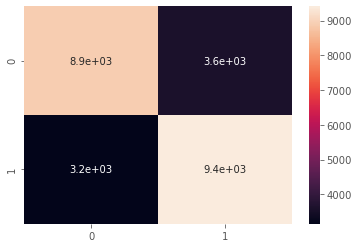

In [122]:
# Make Confusion matrix.

sns.heatmap(confusion_matrix(y_valid,logit_predicition),annot=True)

In [123]:
print(classification_report(y_valid,logit_predicition))

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73     12508
         1.0       0.72      0.75      0.74     12562

    accuracy                           0.73     25070
   macro avg       0.73      0.73      0.73     25070
weighted avg       0.73      0.73      0.73     25070



In [124]:
#Apply Randomized Searchcv on Logit model.

param = {"penalty" : ['l1', 'l2', 'none'],
"C" : [0.00001,0.001,0.01,0.05,0.1,0.5,0.8,1,3,5,7,8,10,12,15,18,20,25,30,50,100,120,130,145,200,300,400,500,1000,5000]}

logit_rdm_cv = RandomizedSearchCV(logit_model,param_distributions=param,verbose=5,n_jobs=-1,cv=5,n_iter=20)
logit_rdm_cv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.1s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [1e-05, 0.001, 0.01, 0.05, 0.1,
                                              0.5, 0.8, 1, 3, 5, 7, 8, 10, 12,
                                              15, 18, 20, 25, 30, 50, 100, 120,
                                              130, 145, 200, 300, 400, 500,
                                              1000, 5000],
                                        'penalty': ['l1', 'l2', 'none']},
                   verbose=5)

In [125]:
logit_rdm_cv.best_params_

{'penalty': 'l2', 'C': 500}

In [126]:
logit_rdm_cv.best_estimator_

LogisticRegression(C=500)

In [127]:
logit_rdm_cv.best_score_

0.7295838319372423

In [128]:
# prediciton on validation data
logit_rdm_prediction = logit_rdm_cv.predict(x_valid)

In [129]:
# Accuracy Score.
accuracy_score(y_valid,logit_rdm_prediction)

0.7308336657359393

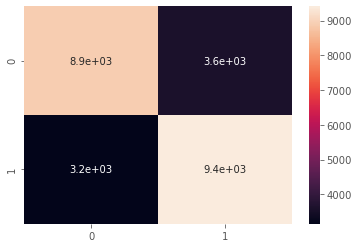

In [130]:
# Make Confusion matrix.
sns.heatmap(confusion_matrix(y_valid,logit_rdm_prediction),annot=True)

In [131]:
print(classification_report(y_valid,logit_rdm_prediction))

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73     12508
         1.0       0.72      0.75      0.74     12562

    accuracy                           0.73     25070
   macro avg       0.73      0.73      0.73     25070
weighted avg       0.73      0.73      0.73     25070



Apply Gradient Boosting Classifier

In [132]:
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train,y_train)
gb_model.score(x_train,y_train)

0.9224305278553384

In [133]:
# prediciton on validation data

gb_prediction = gb_model.predict(x_valid)

In [134]:
# Accuracy Score.
accuracy_score(y_valid,gb_prediction)

0.9179896290386916

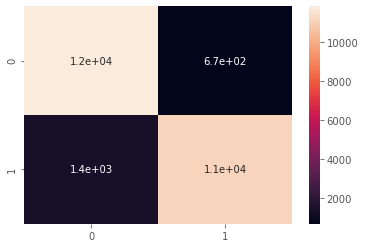

In [135]:
# Make Confusion matrix.

sns.heatmap(confusion_matrix(y_valid,gb_prediction),annot=True)

In [136]:
print(classification_report(y_valid,gb_prediction))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92     12508
         1.0       0.94      0.89      0.92     12562

    accuracy                           0.92     25070
   macro avg       0.92      0.92      0.92     25070
weighted avg       0.92      0.92      0.92     25070



In [137]:
#Apply Randomized Searchcv on GB model.

parameters = {"n_estimators":[100,200,300,400,500,600,700,800,900],"learning_rate":[0.01,0.05,0.1,0.3,0.5,0.6,0.7]
              ,"max_depth":[3,4,5,6,7,8,9,10,12],"min_samples_split":[2,5,8,10,12,15,18,20],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7,8]}

rdm_gb = RandomizedSearchCV(gb_model,param_distributions=parameters,n_iter=25,n_jobs=-1,cv=10,verbose=2)

rdm_gb.fit(x_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 65.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 93.4min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5, 0.6, 0.7],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      12],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7, 8],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              15, 18, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   verbose=2)

In [138]:
rdm_gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, max_depth=6, max_features='auto',
                           min_samples_leaf=6, min_samples_split=20)

In [139]:
rdm_gb.best_params_

{'n_estimators': 100,
 'min_samples_split': 20,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 6,
 'learning_rate': 0.5}

In [140]:
rdm_gb.best_score_

0.9654700172849354

In [141]:
#Prediction on Validation Data

rdm_gb_prediction = rdm_gb.predict(x_valid)

In [142]:
# Accuracy Score.
accuracy_score(y_valid,rdm_gb_prediction)

0.9626246509772637

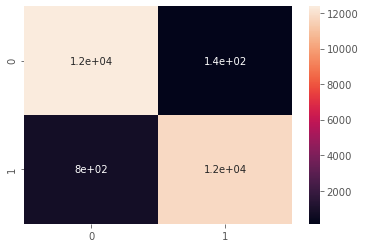

In [143]:
# Make Confusion matrix.

sns.heatmap(confusion_matrix(y_valid,rdm_gb_prediction),annot=True)

In [145]:
print(classification_report(y_valid,rdm_gb_prediction))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     12508
         1.0       0.99      0.94      0.96     12562

    accuracy                           0.96     25070
   macro avg       0.96      0.96      0.96     25070
weighted avg       0.96      0.96      0.96     25070



In [146]:
import pickle

pickle_out = open("gb_model.pickle","wb")
pickle.dump(rdm_gb,pickle_out)
pickle_out.close

<function BufferedWriter.close>

Apply XGB Classifier

In [147]:
xgb_model  = XGBClassifier()
xgb_model.fit(x_train,y_train)
xgb_model.score(x_train,y_train)

0.9705225368966893

In [148]:
#do Prediction on Test Dataset

xgb_prediction = xgb_model.predict(x_valid)

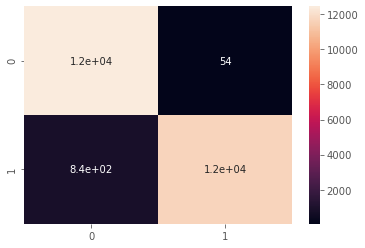

In [149]:
sns.heatmap(confusion_matrix(y_valid,xgb_prediction),annot=True)

In [150]:
print(classification_report(y_valid,xgb_prediction))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     12508
         1.0       1.00      0.93      0.96     12562

    accuracy                           0.96     25070
   macro avg       0.97      0.96      0.96     25070
weighted avg       0.97      0.96      0.96     25070



Apply RandomizedSearchCV with XGB

In [151]:
param_dist = {"n_estimators":[100,200,300,400,500,600,700,800],"learning_rate":[0.001,0.01,0.1,0.3,0.5,0.7],
              "max_depth":[3,5,7,10,12,15],"gamma":[0.001,0.01,0.1,1,10],"reg_alpha":[0,0.1,0.5,0.7,1],
              "reg_lambda":[1,10,50,80,100,120,150]}

rdm_search = RandomizedSearchCV(xgb_model,param_distributions=param_dist,n_jobs=-1,n_iter=25,cv=8,verbose=5)
rdm_search.fit(x_train,y_train)

Fitting 8 folds for each of 25 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 36.9min finished


RandomizedSearchCV(cv=8,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_pa...
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exac

In [152]:
rdm_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=50, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
rdm_search.best_params_

{'reg_lambda': 50,
 'reg_alpha': 1,
 'n_estimators': 500,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.1}

In [154]:
rdm_search.best_score_

0.9673447283156638

In [155]:
#do Prediction on Test Dataset

rdm_xgb_prediction  = rdm_search.predict(x_valid)

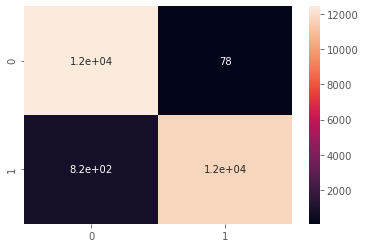

In [156]:
sns.heatmap(confusion_matrix(y_valid,rdm_xgb_prediction),annot=True)

In [157]:
print(classification_report(y_valid,rdm_xgb_prediction))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     12508
         1.0       0.99      0.93      0.96     12562

    accuracy                           0.96     25070
   macro avg       0.97      0.96      0.96     25070
weighted avg       0.97      0.96      0.96     25070



In [158]:
import pickle 
pickle_out = open("hr_analytics_model.pickle","wb")
pickle.dump(rdm_search,pickle_out)
pickle_out.close()

Apply RandomForest Classifier

In [159]:
rf_model  = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_model.score(x_train,y_train)

0.9994016753091344

In [160]:
#do Prediction on Test Dataset

rf_prediction = rf_model.predict(x_valid)

In [161]:
# Accuracy Score.
accuracy_score(y_valid,rf_prediction)

0.9560430793777424

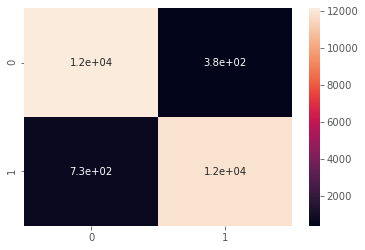

In [162]:
# Make Confusion matrix.

sns.heatmap(confusion_matrix(y_valid,rf_prediction),annot=True)

In [163]:
print(classification_report(y_valid,rf_prediction))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96     12508
         1.0       0.97      0.94      0.96     12562

    accuracy                           0.96     25070
   macro avg       0.96      0.96      0.96     25070
weighted avg       0.96      0.96      0.96     25070



In [165]:
#Apply Randomized Searchcv on Random Forest model.

parameters = {"n_estimators":[100,200,300,400,500,600,700,800],"criterion":["gini", "entropy"]
              ,"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,3,5,6,7],"bootstrap":[True,False]}

rdm_rf = RandomizedSearchCV(rf_model,param_distributions=parameters,n_iter=25,n_jobs=-1,cv=8,verbose=2)

rdm_rf.fit(x_train,y_train)

Fitting 8 folds for each of 25 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 19.4min finished


RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18, 25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   verbose=2)

In [166]:
rdm_rf.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=25,
                       max_features='sqrt', min_samples_split=10,
                       n_estimators=200)

In [167]:
rdm_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'entropy',
 'bootstrap': False}

In [168]:
rdm_rf.best_score_

0.9561893028438343

In [169]:
#Prediction Validation Data

rdm_rf_prediction = rdm_rf.predict(x_valid)

In [170]:
# Validation Accuracy

accuracy_score(y_valid,rdm_rf_prediction)

0.9568408456322297

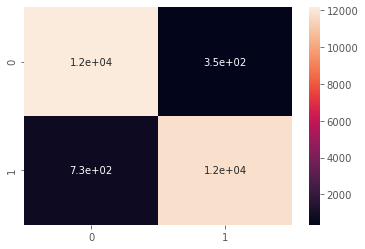

In [171]:
# Make Confusion matrix.

sns.heatmap(confusion_matrix(y_valid,rdm_rf_prediction),annot=True)

In [172]:
print(classification_report(y_valid,rdm_rf_prediction))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96     12508
         1.0       0.97      0.94      0.96     12562

    accuracy                           0.96     25070
   macro avg       0.96      0.96      0.96     25070
weighted avg       0.96      0.96      0.96     25070



# Conclusion

XGB Classifier gives the highest Accuracy Score in comparion of Gradient Boosting, Random Foresh and Logistic Regression so use XGB Classifier for Test data prediction.

# Prediction on Test Dataset.

In [173]:
rdm_search_prediction = rdm_search.predict(test)

In [174]:
pred = pd.DataFrame(rdm_search_prediction.astype(int))
sub_df = pd.read_csv("sample_submission.csv")
datasets=pd.concat([sub_df["employee_id"],pred],axis=1)
datasets.columns=["employee_id","is_promoted"]
datasets.to_csv("hr_analytics_output.csv",index=False)